In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
img_rows, img_cols = 128, 128
input_shape = (img_rows,img_cols,3)

Using TensorFlow backend.


In [3]:
model = keras.models.load_model('italianet_keras_v1.h5')


[ 0.86063951  0.13936043]


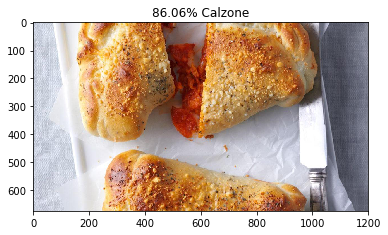

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt #import library for graphing and displaying images

img = cv2.imread("sample.jpg") #read the image and store it into a variable
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

im = cv2.resize(orig,(128,128))#resize it to pass it into the neural network
im = np.reshape(im,(1,128,128,3))/255 #normalize (divide by 255)

model_out = model.predict([im])[0] #use the trained model to predict what the image is
print(model_out)
pizzaness = round(model_out[1]*100, 2) #give it a pizza-ness score based on the model output
    
if pizzaness >= 50: #if the pizza-ness is greater than 50%, then its a pizza
    str_label = '{}% Pizza'.format(pizzaness)
else: #otherwise its a calzone
    str_label = '{}% Calzone'.format(100-pizzaness)

plt.imshow(orig,interpolation='nearest')
plt.title(str_label) #display the score
plt.show() #display the image

In [7]:
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')